In [1]:
from google.colab.patches import cv2_imshow 
from google.colab import drive 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 모폴로지(형태학) 연산을 이용한 영상처리

# 모폴로지 연산자(Morphological Operator)

  모폴로지 연산자란 입력으로 이진영상과 구조요소를 받고

  연산 집합(교집합, 합집합,여집합, 포함)을 이용하여 둘을 결합함

  (일반적으로 이진 영상을 입력하나 그레이, 컬러영상도 가능하긴 함)

  \

  모폴로지 연산자는 구조요소의 특성에따라 기본연산자와 정교연산자로 나뉨

  기본적 연산자는 구조요소의 값이 전경(foreground : 1인 영역)과 고려안함(don`t care : 아무것도 표시안된 영역)으로 이루어짐

  정교 연산자sophisticated는 추가로 배경(background : 0인 영역)을 포함함





# 구조요소(Structure Element)

구조요소는 커널kernel이라고도 하지만 컨벌루션의 커널과 다른 개념이다

구조요소 특정 구조를 지닌 마스크 형태, 요소는 아래 셋 중 하나를 가짐

1 / don`t care (빈칸) / 0 

또 요소 중 하나는 원점origin을 나타내는데

같은 모양, 요소의 구조요소여도 원점이 다르면 결과가 다르게 나타남



# 팽창연산 (Dilation)

팽창(dilatation)은 물체의 주변을 확장하는 연산

영상 내부 객체의 역역은 확장시키고 배경영역은 감소시킨다

구조 요소와 입력 영상을 비교하여 1개 이상의 1이 존재하면 1로 변경

이같은 결과는 구성요소의 크기나 원점, 각 좌표의 값중 변하는게 있으면 결과도 변함





이진영상의 연산 구현

Mounted at /content/gdrive
Original image


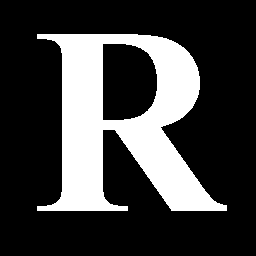

Dilated image


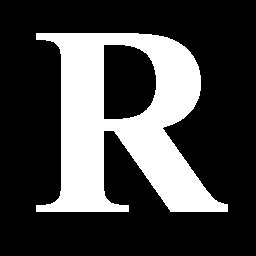

Edge image


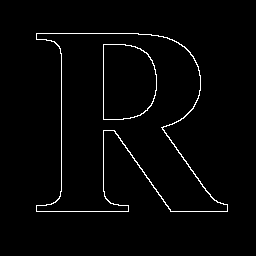

In [2]:
drive.mount('/content/gdrive')
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/char.bmp')
kernel = np.ones((3,3),np.uint8) # 1로 채운 3x3 array 생성
dilation = cv2.dilate(img,kernel,iterations = 1) # iterations = 1은 반복할 횟수

print("Original image")
cv2_imshow(img)
print("Dilated image")
cv2_imshow(dilation)
print("Edge image")
cv2_imshow(dilation-img) # 팽창연사의 결과에서 원영상을 빼면 팽창된 부분만 출력

cv2.dilate 함수 이용하여 그레이 영상의 팽창연산 구현

그레이 영상에서 팽창연산은 범위 내의 입력영상과 구조요소의 합의 최대값을 중심값으로 삼기때문에 영상이 전체적으로 밝아지는 결과가 나옴

영상의 잡음제거에도 많이 쓰이는 방식이며 주변 영상보다 밝기가 낮은 잡음에 효과적임


Original image


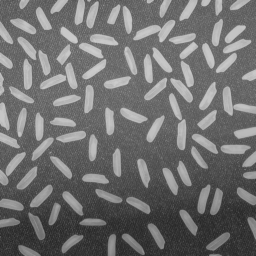

Gray dialtion 1


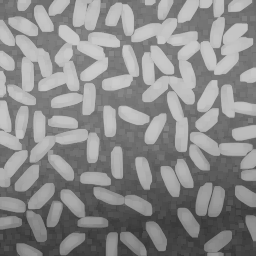

Gray dialtion 3


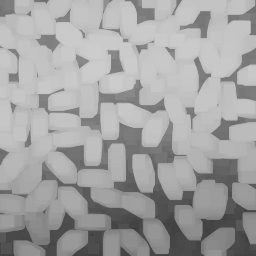

In [3]:
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/rice.bmp',0) # 2번째 인자에 0을 붙여 그레이영상으로 부르기

# 구조요소
kernel = np.ones((3,3),np.uint8) # cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))과 동일
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) # 원형 커널
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) # 중심점 기준 십자 커널
# 이론상으로는 구조요소별로 다른 결과지만 이미지가 작아서 그런가 육안상 구분이 거의 안된다
dilation = cv2.dilate(img,kernel,iterations = 2)
dilation3 = cv2.dilate(dilation,kernel,iterations = 3)

print("Original image")
cv2_imshow(img)
print("Gray dialtion 1")
cv2_imshow(dilation)
print("Gray dialtion 3")
cv2_imshow(dilation3)

# 침식연산(Erosion)

침식연산은 이미지를 깍아내는 영상으로 팽창연산의 반대이다

팽창연산이 전경영역을 테두리에서 외부로 확장시키는 것이라면,

침식연산은 전경영역을 테두리에서 내부 방향으로 침식시킨다.

여러 물체가 접해있는 경우, 각각의 물체들을 분리하는데 활용된다

연산시 구조요소의 크기에따라 물체 형태 왜곡이 생기는 것을 주의해야함

이진영상의 침식연산 구현


Original image


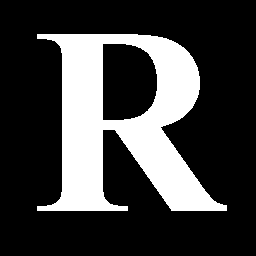

Erosion 1 image


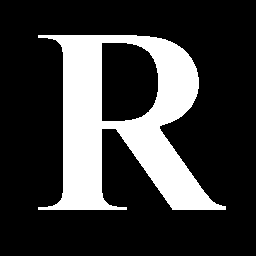

Erosion 5 image


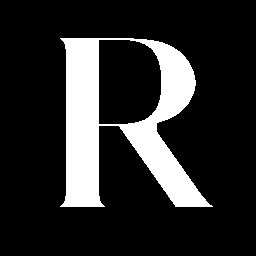

In [4]:
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/char.bmp')
kernel = np.ones((3,3),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations = 1)
erosion4 = cv2.erode(img,kernel,iterations = 4) # 반복횟수 4회 설정. 이이상은 형태왜곡으로 알파벳 끊어짐

print("Original image")
cv2_imshow(img)
print("Erosion 1 image")
cv2_imshow(erosion1)
print("Erosion 5 image")
cv2_imshow(erosion4)

그레이 영상의 침식 연산


그레이 영상에서 침식연산은 범위 내의 입력영상과 구조요소의 차의 최소값을 중심값으로 삼기때문에 영상이 전체적으로 어두워지는 결과가 나옴

(팽창연산의 반대로 생각하면 편함)

Original image


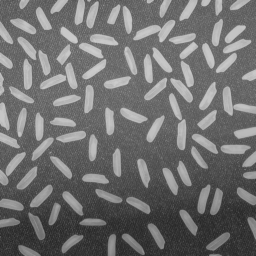

Erosion 1 image


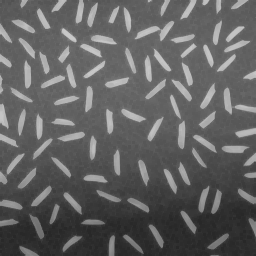

Erosion 3 image


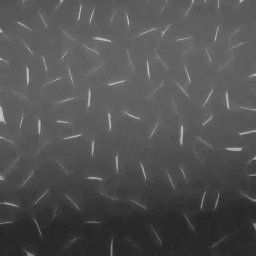

In [5]:
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/rice.bmp',0)# 그레이 영상으로 호출
kernel = np.ones((3,3),np.uint8)
erode1 = cv2.erode(img,kernel,iterations = 1)
erode3 = cv2.erode(img,kernel,iterations = 3)

print("Original image")
cv2_imshow(img)
print("Erosion 1 image")
cv2_imshow(erode1)
print("Erosion 3 image")
cv2_imshow(erode3)

침식은 어두운 부분의 집음을, 팽창은 밝은 부분의 잡음을 제거하는 효과가 있다

이런 방식은 효과는 좋으나 형태왜곡이 일어날 수 있기에

침식과 팽창의 연산을 조합하여 원래의 모양을 유지하면서 잡음을 제거할 수 있다.

침식 연산 후 팽창 연산을 적용하는 것을 열림연산, 

팽창 연산 후 침식 연산을 적용하는 것을 닫힘연산이라함

# 열림연산(Openig)

열림 연산은 주변보다 밝은 잡음 돌출된 모양을 제거, 

닿아있는  개체를 분리하는 데 효과적이다



열림연산 구현

열림연산의 구현은 단순히 침식연산과 팽창연산을 순차적으로 수행하면 된다

\

이진영상을 보면 끝모양은 살짝 침식되었지만 전체적인 형태를 유지한것을 볼 수 있다

결과 반복 횟수에 상관없이 동일한 결과가 나오는 장점이 있음

\

그레이 영상을 보면 구조요소보다 크기가 작은 밝은 특징은 밝기가 감소 됨을 볼 수 있다.

구조요소보다 크기가 큰 밝은 특징은 상대적으로 변화가 적다

즉, 영상의 밝은 패턴들을 선택적으로 유지하고 나머지 밝은 특징을 감소시키는게 가능하다








Original image


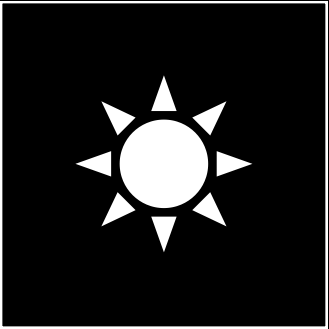

Binary opening


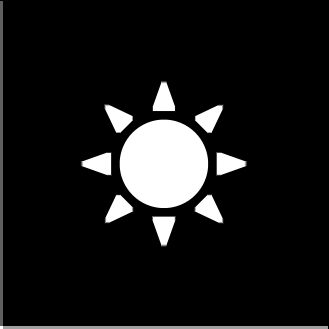

Original image


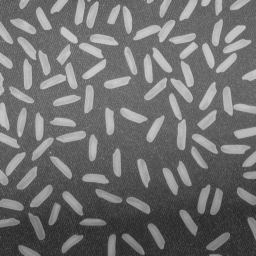

Gray opening


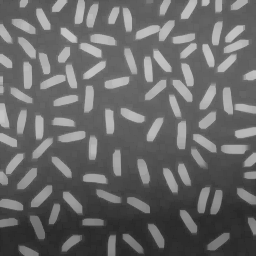

In [8]:
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/Picture4.png')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/rice.bmp')
kernel = np.ones((5,5),np.uint8)
opening1 = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel) #  cv2.MORPH_OPEN은 열림연산 의미
opening2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)

print("Original image")
cv2_imshow(img1)
print("Binary opening")
cv2_imshow(opening1)
print("Original image")
cv2_imshow(img2)
print("Gray opening")
cv2_imshow(opening2)

# 닫힘연산(Closing)


닫힘 연산은 주변보다 어두운 잡음을 제거하는데 효과적이면서 끊어져 보이는 개체를 연결하거나 구멍을 메우는 데 효과적임

주의할 점은 메우려는 전경 구멍보다 작은 구성요소를 사용해야 유효함

구성요소보다 큰 어두운 특징은 변화가 적게 나타난다.

열림 연산과 닫힘 연산은 배경에 대한 결과가 똑같다



그레이 연산의 닫힘연산 구현

닫힘연산의 구현은 단순히 팽창연산과 침식연산을 순차적으로 수행하면 된다



Original image


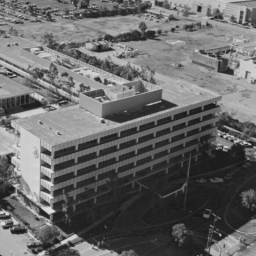

Closing gray image


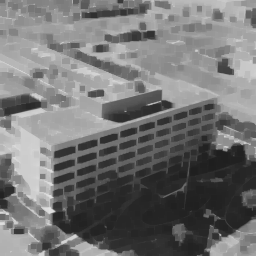

In [7]:
img = cv2.imread('/content/gdrive/My Drive/Image_Processing/aero2.bmp')
kernel = np.ones((5,5),np.uint8) # 1로 채워진 5x5 구조요소 array생성
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel) # cv2.MORPH_CLOSE는 닫힘연산 의미

print("Original image")
cv2_imshow(img)
print("Closing gray image")
cv2_imshow(closing)